From the Official Kaggle Dataset Page (https://www.kaggle.com/sudalairajkumar/indian-startup-funding)

Interested in the Indian startup ecosystem just like me? Wanted to know what type of startups are getting funded in the last few years? Wanted to know who are the important investors? Wanted to know the hot fields that get a lot of funding these days? This dataset is a chance to explore the Indian start up scene. Deep dive into funding data and derive insights into the future!

This dataset Contains Information about Indian Startups from 2015-2019 regarding information about startups such as their location,amount of funding they have received etc.This dataset can help us understand the startup landscape and help us in comparing with current startup landscape in india.

In [1]:
'''Importing Libraries'''

import pandas as pd
import numpy as np
from matplotlib.pyplot import plot as plt
import seaborn as sns
import geopandas as gpd

pd.set_option('display.max_rows',3000)

In [27]:
'''Load Data and rename columns to enable us to use dot notation and to parse Date as a datetime object which can 
give us much more insights with the dates.Header tells pandas to ignore the first line which is the header of the 
column

Having Some Issue with the Geomapping Code.Cleaned Up the Replace Method Now

Removing the Remarks Column Since there are around 85% values empty
'''

startup_data=pd.read_csv('startup_funding_modified.csv',header=0,encoding='utf8',names=['Sr_No','Startup_Date','Startup_Name','Industry_Vertical','SubVertical','City_Location','Investor_Name','Investment_Type','Amount_in_USD','Remarks'])

startup_data.drop(columns='Remarks',inplace=True)

In [20]:
'''Information about the memory consumption of the dataset.This step is important as it can tell us if we need to
read the dataset in chunks while reading the data in whichever format we have available'''

startup_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 9 columns):
Sr_No                3009 non-null int64
Startup_Date         3009 non-null object
Startup_Name         3009 non-null object
Industry_Vertical    2838 non-null object
SubVertical          2073 non-null object
City_Location        2829 non-null object
Investor_Name        2986 non-null object
Investment_Type      3006 non-null object
Amount_in_USD        2045 non-null object
dtypes: int64(1), object(8)
memory usage: 1.6 MB


In [13]:
'''Basic stats about the dataset'''
startup_data.describe(include=['object','int'])

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD,Remarks
count,0.0,0,0,0,0,0,0,0,0,0
unique,NaN,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Our Inference About the Above Basic Stats:</b>

<b>Ola Cabs is the Most Common Startup Name</b>.This could be because Ola is involved in a lot of verticals(Food,Item  Delivery,Grocery etc).Or it could also be because there is some labelling issue with the dataset.

<b>Out of 3000 records.almost a quarter(25%) of those startups belong to Bangalore.</b>This should be of no surprise as 
Bangalore is rightfully called the "Silicon Valley Of India."

<b>Most Investors try to acquire a part of the company in which they invest.</b>This is because they would like to see a positive return on their investment and also to help it grow.

You can refer to this link for More Information:https://www.investopedia.com/articles/financial-careers/09/private-equity.asp

In [41]:
'''Fixed Erroneous records from the dataset file so that no issues in python file.'''

startup_data["Startup_Date"]= pd.to_datetime(startup_data["Startup_Date"])

In [170]:
# startup_data.Startup_Date_2.nunique()
# pd.isna(startup_data.Startup_Date_2).value_counts()
#For now Dropped records which have Nan in Date after coercion(See above)
# startup_data.Startup_Date_2.dropna(inplace=True)
# pd.to_datetime(startup_data.Startup_Date,format="%d/%m/%Y",errors='coerce'

In [52]:
startup_data.head(10)

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD,Rermarks,New_City_Location
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"4,500,000",NaN,Maharashtra
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"3,300,000",NaN,Maharashtra
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"6,000,000",NaN,Maharashtra
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"5,000,000",NaN,Telangana
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"18,000,000",NaN,NaN
5,5,04/09/2019,Myelin Foundry,Information Technology,Deep-technology,Bangalore,Endiya Partners,Seed,"10,00,000",NaN,Karnataka
6,6,04/09/2019,Atomberg Technology,Consumer Technology,"Consumer Electronics, Home Appliances",Mumbai,A91 Partners,Series A,"10,000,000",NaN,Maharashtra
7,7,04/09/2019,GOQii,Health and Wellness,Wearable Fitness Bands,California,Bennett Coleman and Company Ltd (BCCL),Series C,"450,000,000",NaN,NaN
8,8,03/09/2019,Vyapar App,Accounting,Mobile-based Accounting Software,Bangalore,"India Quotient, Axilor Ventures",Series A,"5,000,000",NaN,Karnataka
9,10,01/08/2019,CarDekho,E-Commerce,Automotive,Gurgaon,SC GG India Mobility Holdings LLC,Series C,"20,000,000",NaN,NCT of Delhi


In [56]:
geo_data=gpd.read_file('Admin2.shp')

In [58]:
startup_data['New_City_Location']=city_data

In [39]:
# Panaji Ahemadabad Trivandrum Kochi Kanpur Surat Bhopal Gwalior Udupi Udaipur Agra Siliguri Karur Ahmedabad Delhi
# Kolkatta Hubli Lucknow Panaji Gaya Kozhikode Bhubneswar Jodhpur Varanasi Rourkela Belgaum Bhubaneswar New NCT of Delhi

In [15]:
?pd.merge

In [59]:
new_dataframe=pd.merge(left=geo_data,right=startup_data,how='right',left_on='ST_NM',right_on='New_City_Location')

In [60]:
new_dataframe.New_City_Location.value_counts(dropna=True)

NCT of Delhi       886
Karnataka          846
Maharashtra        685
Telangana          100
Chennai             98
Gujarat             53
Rajasthan           33
West Bengal         24
Madhya Pradesh      18
Goa                 12
Chandigarh          11
Uttar Pradesh        9
Tamil Nadu           7
Kerala               6
Haryana              3
Bihar                2
Odisha               2
Jammu & Kashmir      1
Name: New_City_Location, dtype: int64

In [36]:
city_data=startup_data.City_Location

In [37]:
replacement_dictionary={"USA":np.NaN,"US":np.NaN,"US/India":np.NaN,"Dallas":np.NaN,"Boston":np.NaN,"New York":np.NaN,"London":np.NaN,"Nairobi":np.NaN,"SFO / Karnataka":np.NaN,"Seattle":np.NaN,"San Francisco":np.NaN,"Santa Monica":np.NaN,"Missourie":np.NaN,"India":np.NaN,"Palo Alto":np.NaN,"California":np.NaN,"SFO / Bangalore":np.NaN,"Burnsville":np.NaN,"Singapore":np.NaN,"Bangalore":"Karnataka","Belgaum":"Karnataka","Udupi":"Karnataka","New Delhi":"NCT of Delhi","Gurgaon":"NCT of Delhi","Noida":"NCT of Delhi","Delhi":"NCT of Delhi","Gurugram":"NCT of Delhi","Mumbai":"Maharashtra","Pune":"Maharashtra","Nagpur":"Maharashtra","Hyderabad":"Telangana","Faridabad":"Haryana","Surat":"Gujarat","Ahmedabad":"Gujarat","Ahemdabad":"Gujarat","Ahemadabad":"Gujarat","Vadodara":"Gujarat","Jaipur":"Rajasthan","Jodhpur":"Rajasthan","Udaipur":"Rajasthan","Kolkata":"West Bengal","Kolkatta":"West Bengal","Indore":"Madhya Pradesh","Bhopal":"Madhya Pradesh","Gwalior":"Madhya Pradesh","Coimbatore":"Tamil Nadu","Karur":"Tamil Nadu","Hubli":"Tamil Nadu","Panji":"Goa","Panaji":"Goa","Kozhikode":"Kerala","Trivandrum":"Kerala","Agra":"Uttar Pradesh","Kanpur":"Uttar Pradesh","Lucknow":"Uttar Pradesh","Varanasi":"Uttar Pradesh","Gaya":"Bihar","Bhubneswar":"Odisha","Bhubaneswar":"Odisha","New New Delhi":"NCT of Delhi","Nw Delhi":"NCT of Delhi","Kochi":"Kerala","Srinagar":"Jammu & Kashmir","Rourkela":"Bihar","Siliguri":"West Bengal"}

city_data=startup_data.City_Location.replace(replacement_dictionary)

startup_data['New_City_Location']=city_data

In [65]:
print(new_dataframe.value_counts(dropna=False))
# print("####################")
# print(geo_data.ST_NM.unique())

AttributeError: 'GeoDataFrame' object has no attribute 'value_counts'

In [75]:
new_dataframe.New_City_Location.dropna(inplace=True)

In [76]:
new_dataframe.New_City_Location.value_counts(dropna=False)

NCT of Delhi       886
Karnataka          846
Maharashtra        685
Telangana          100
Chennai             98
Gujarat             53
Rajasthan           33
West Bengal         24
Madhya Pradesh      18
Goa                 12
Chandigarh          11
Uttar Pradesh        9
Tamil Nadu           7
Kerala               6
Haryana              3
Bihar                2
Odisha               2
Jammu & Kashmir      1
Name: New_City_Location, dtype: int64

TypeError: '<' not supported between instances of 'float' and 'str'

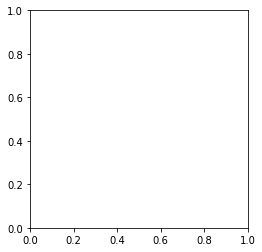

In [87]:
# fig, ax = plt.subplots(1, figsize=(10, 6))
new_dataframe=new_dataframe.loc[:,['ST_NM',"geometry","New_City_Location"]]

new_dataframe.plot(column='New_City_Location',cmap='Blues', linewidth=0.8, edgecolor='0.8')

In [88]:
new_dataframe.dtypes

ST_NM                  object
geometry             geometry
New_City_Location      object
dtype: object

In [94]:
testing_data=startup_data.Amount_in_USD.copy()

In [95]:
testing_data=testing_data.replace('[,]','',regex=True)
testing_data=testing_data.replace('\.\d*','',regex=True)

0        4500000
1        3300000
2        6000000
3        5000000
4       18000000
          ...   
3004     4500000
3005      825000
3006     1500000
3007         NaN
3008      140000
Name: Amount_in_USD, Length: 3009, dtype: object

In [102]:
# dict(testing_data.value_counts())

TypeError: '<' not supported between instances of 'float' and 'str'

In [30]:
startup_data.Amount_in_USD=startup_data.Amount_in_USD.replace('[,]','',regex=True)
# startup_data.Amount_in_USD=startup_data.Amount_in_USD.replace('\.\d*','',regex=True)
startup_data.Amount_in_USD=startup_data.Amount_in_USD.replace('\+*','',regex=True)

startup_data.drop(startup_data.loc[(startup_data.Amount_in_USD=='Undisclosed') | (startup_data.Amount_in_USD=='undisclosed')].index,inplace=True)

startup_data.Amount_in_USD.dropna(inplace=True)

startup_data.Amount_in_USD=pd.to_numeric(startup_data.Amount_in_USD)
# startup_data.Amount_in_USD=startup_data.Amount_in_USD.astype(int)

In [28]:
# plt.hist(x=startup_data.Amount_in_USD)
# plt.show()

In [22]:
startup_data.drop(startup_data.loc[(startup_data.Amount_in_USD=='Undisclosed') | (startup_data.Amount_in_USD=='undisclosed')].index,inplace=True)

In [31]:
startup_data.Amount_in_USD.value_counts(dropna=False)

NaN             964
1.000000e+06    166
5.000000e+05    108
2.000000e+06     68
5.000000e+06     67
3.000000e+06     65
1.000000e+07     61
1.000000e+05     57
1.500000e+05     45
2.000000e+05     44
2.500000e+05     41
1.500000e+07     39
6.000000e+06     39
1.500000e+06     36
4.000000e+06     35
3.000000e+05     31
2.500000e+06     25
6.000000e+05     24
5.000000e+07     22
2.000000e+07     21
4.000000e+05     21
1.200000e+06     20
3.000000e+07     18
2.500000e+07     18
1.000000e+08     17
4.500000e+05     17
7.000000e+06     16
3.500000e+05     14
7.500000e+05     13
1.200000e+07     13
1.600000e+07     12
8.000000e+06     12
4.500000e+06     12
1.100000e+06     12
1.100000e+07     11
3.500000e+06     11
6.500000e+05     10
5.000000e+04     10
1.300000e+06     10
7.000000e+05      9
3.500000e+07      9
3.100000e+06      9
7.500000e+06      8
1.200000e+05      8
1.800000e+05      8
6.000000e+07      8
4.000000e+04      7
1.800000e+07      7
1.600000e+05      7
9.000000e+05      7


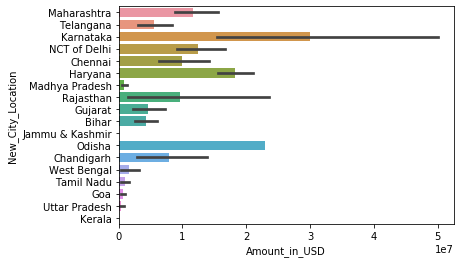

In [40]:
'''Inference
Karnataka has the Highest Number of Startups with the Most Value
Kerala has the least Startups in terms of value

Surprisingly,Value of Startups in Haryana is more than that of Maharashtra(Check Startups based on New City Localtion)
'''

sns.barplot(x='Amount_in_USD',y='New_City_Location',data=startup_data)

In [32]:
'''Percentage of Missing records'''

startup_data.isnull().sum()/len(startup_data)

Sr_No                0.000000
Startup_Date         0.000000
Startup_Name         0.000000
Industry_Vertical    0.056924
SubVertical          0.311585
City_Location        0.059920
Investor_Name        0.007656
Investment_Type      0.000999
Amount_in_USD        0.320905
dtype: float64

In [33]:
?sns.scatterplot

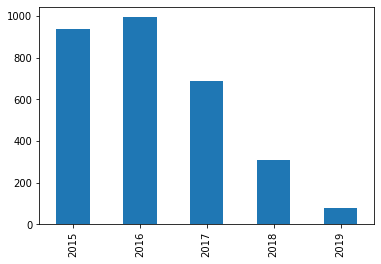

In [46]:
'''Inference
The startup scene in india basically peaked at around 2016 and has been on a decline ever since.Maybe some governmental factors have come into picture or there are too many people trying to jump in this field.This has resulted in lesser amount of funding for everybody
'''
startup_data.Startup_Date.dt.year.value_counts().sort_index().plot(kind='bar')

In [49]:
'''Startups which have received funding in the year 2019'''
startup_fund_2019=startup_data.loc[startup_data.Startup_Date.dt.year==2019]

In [50]:
max(startup_fund_2019.Amount_in_USD)

3900000000.0

In [51]:
min(startup_fund_2019.Amount_in_USD)

145000.0

In [55]:
startup_fund_2019.Amount_in_USD.mean()

82673686.96481013

In [56]:
startup_fund_2016=startup_data.loc[startup_data.Startup_Date.dt.year==2016]
print(max(startup_fund_2016.Amount_in_USD))

print(min(startup_fund_2016.Amount_in_USD))

print(startup_fund_2016.Amount_in_USD.mean())

200000000.0
22500.0
6532574.416382252


Inference for the above calculations.
Although the NUmber of startups which have got funding in the year 2019,there is still more money with these startups than our older startups.Maybe we can also check whether the startups which have received this new funding are well established startups or new Startups

In [67]:
list_startups_2019=startup_fund_2019.Startup_Name.unique().tolist()

In [66]:
'''Very Few Startups have received funding twice in the same financial year(Which is pretty rare) while almost all the others have received only funding once in the entire year.'''

Bira91                                                    2
CarDekho                                                  2
Uniphore                                                  2
Chakr Innovation                                          1
RenewBuy                                                  1
Azah                                                      1
Rapido Bike Taxi                                          1
Tala                                                      1
Kabadiwala                                                1
Shuttl                                                    1
House of Msasaba                                          1
NoBroker                                                  1
Pratilipi                                                 1
Craftsvilla                                               1
Atlan                                                     1
Biz2Credit                                                1
Ola Cabs                                

In [69]:
list_startups_2016=startup_fund_2016.Startup_Name.unique().tolist()

In [70]:
'''Here the difference in clear.The reason for more amount of funding received was due to more startups being launched and several of these startups received funding multiple times withing the same calender year(More than the number of startups in the year 2019)'''

NoBroker                     4
Koovs                        3
TinyStep                     3
Swiggy                       3
Byjus                        3
Simplilearn                  2
WorkIndia                    2
N.O.W                        2
LetsMD                       2
Murgency                     2
Pikkol                       2
ShareChat                    2
Servify                      2
Voonik                       2
Kartrocket                   2
Fisdom                       2
Medinfi                      2
Lenskart                     2
TripShelf                    2
GOQii                        2
FreshMenu                    2
RailYatri                    2
Druva                        2
Wooplr                       2
Furlenco                     2
OfBusiness                   2
Meesho                       2
Flyrobe                      2
Tracxn                       2
Moglix                       2
Zarget                       2
Mobikwik                     2
Bonhomia

In [74]:
set(list_startups_2016).intersection(list_startups_2019)

set()

Inference:The startups that were in 2019 were not present earlier in our dataset(Almost all of them were new or not launched in 2019).Maybe we can find some external reason for such a drastic rise and drop in the funding patterns.